# Abalone Age Classification Project Report

This report is for the data analysis project for DSCI 522 (Data Science workflows); a course in the Master of Data Science program at the University of British Columbia. Content includes key exploratory data analysis, statistical summaries and figures.

## Introduction

Abalones are endangered marine snails that are found in the cold coastal water around the world. The price of an abalone is positively associated with its age. However, determining how old an abalone is a very complex process. Having a machine learning model that classifies the age of abalones will efficiently accelerate this manual process, and benefit researches on abalones and add value to the domain.

In this project we are classifying abalone snails into "young" and "old" according to their number of rings based on input features such as abalone's gender, height with meat in shell, weight of the shell etc.


## About the data set

The Abalone data set that was used in this project was sourced from the UC
    Irvine Machine Learning Repository published in 1995. It can be
    found <a href="https://archive-beta.ics.uci.edu/ml/datasets/abalone" >here</a>. Each row in
    the data set represents the attributes and physical measurements of
    abalones including number of rings, sex, length, diameter, height, weight,
    etc. The number of rings were
    counted manually using a microscope by the researchers. The age of an abalone is represented by its number of
    rings plus 1.5 as number of years lived. 
The data set has already removed its missing values and the range of the continuous values have been scaled for use with an ANN (by dividing by 200).

In the research paper "A Quantitative Comparison of Dystal and Backpropagation" that David Clark, Zoltan Schreter and Anthony Adams submitted to the Australian Conference on Neural Networks (ACNN'96), the original abalone data set was treated as a 3-category classification problem (grouping ring classes 1-8, 9 and 10, and 11 on). In our project, we will treat the data set as a 2-categorical classification problem (grouping ring classes less or equal to 11, and more than 11).

Here, we aim to answer one research question with a Logistic Regression classification model: 

- **Given the input features including sex, size and weight, is an abalone young (i.e. number of rings smaller than or equal to 11), or old (i.e. number of rings is larger than 11)?**
    


## Findings and results


The young-old class is determined by the number of rings present on the abalone. Moreover, a threshold of `rings > 11` was set such that abalones that contained greater than 11 rings would be placed in the `old` class and otherwise the abalone would be placed in the `young` class. Using this threshold of `rings > 11`, all of the examples of abalone in the training and test data were split into either the `old` class or the `young` class. To determine any indications of class imbalance based on this threshold, we explored the distribution of target classes (`old` and `young`) in the training data (Figure 1). Indeed, the distribution indicates a class imbalance between `old` and `young` classes within the training data. More specifically, there are 2,576 examples of the class, `young`, whereas there are only 766 examples of the class, `old`, within the training data. Apparently the data is imbalanced. We do not think it is necessary to deal with class imbalance in this case because we are not actively looking into a young or old abalone. However, this is an important component of the training data that needs to be kept in mind as the analysis is followed through.

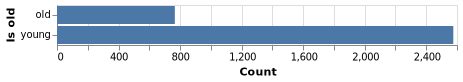

In [2]:
from IPython.display import Image
Image("../results/eda/target_distribution.png")

Figure 1. Distribution of target classes, young and old, for abalone in the training data

Next, we looked to elaborate upon the distribution of numerical features in the training data in relation to the target class (Figure 2). The distribution of the numerical features seemed to follow a similar shape for both the `old` class and the `young` class. The distribution of the length and diameter features was left-skewed, while the whole weight, viscera weight, shucked weight, and shell weight appeared to have a right-skewed distribution. The height feature did not have a clear skewness to the distribution.

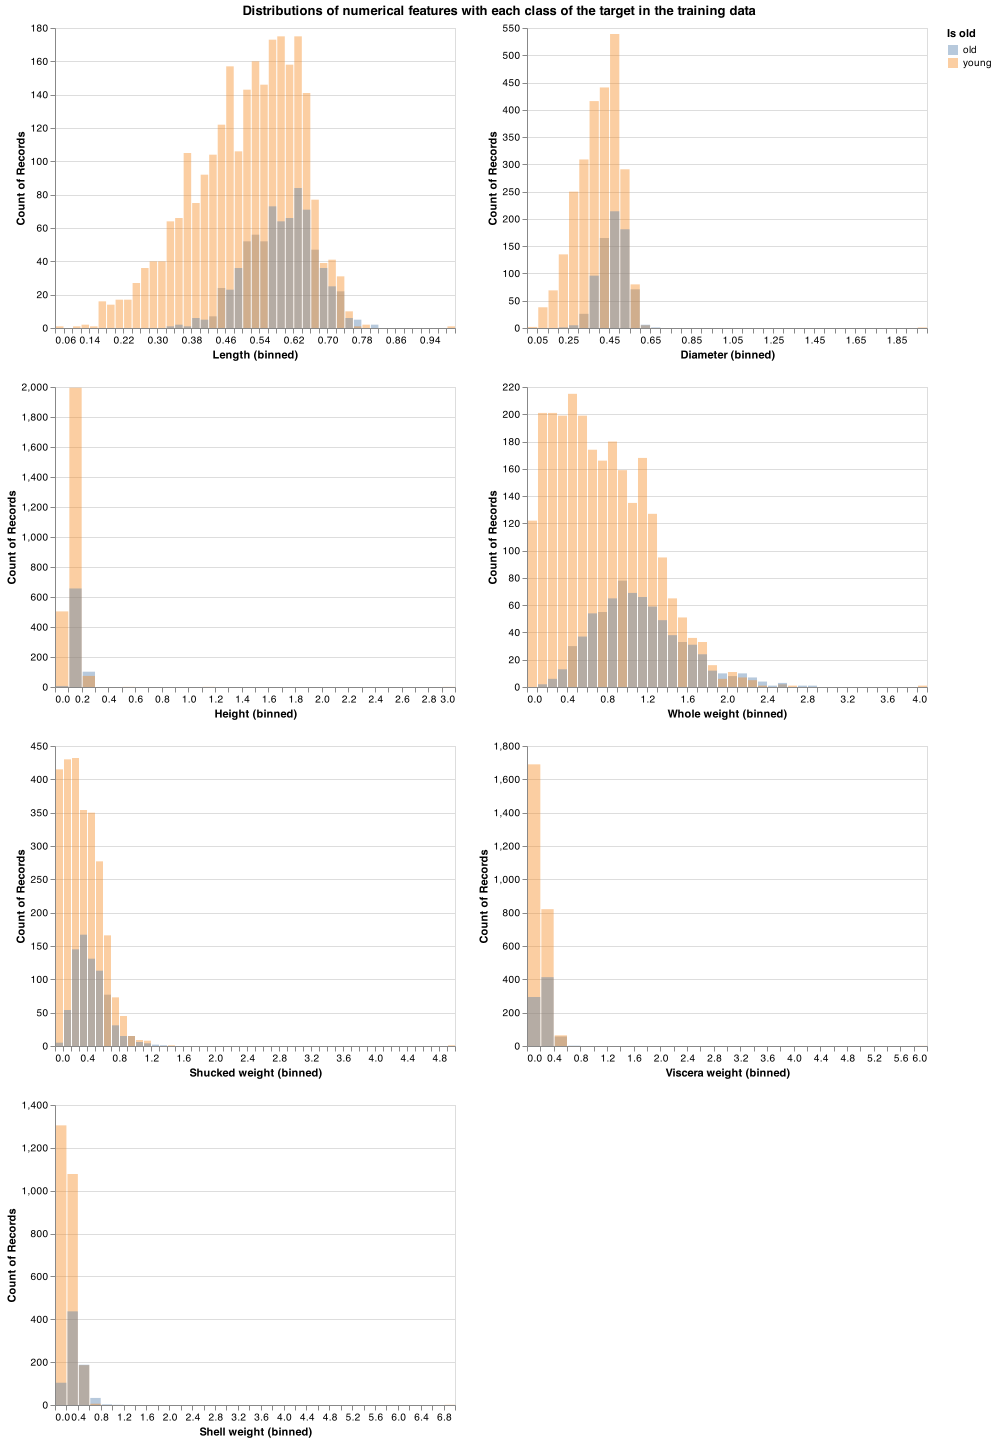

In [2]:
Image("../results/eda/histograms.png")

Figure 2. Distributions of numerical features for both the young and old class of abalone

Observing the distribution of sexes in the training data, there appears to be a relatively even spread of `Female` (F), `Male` (M) within both the `young` and `old` target classes, whereas there are a greater number of `Infant` (I) examples in the `young` class compared to the `old` class (Figure 3). Specifically, there were 354 examples of abalone that were `Male` and 340 examples of abalone that were `Female` in the `old` class and there were 882 examples of abalone that were `Male` and 684 examples of abalone that were `Female` in the `young` class. For the `Infant` class, there was a greater number of examples of `Infant` in the young class (1009) compared to the `old` class (72).

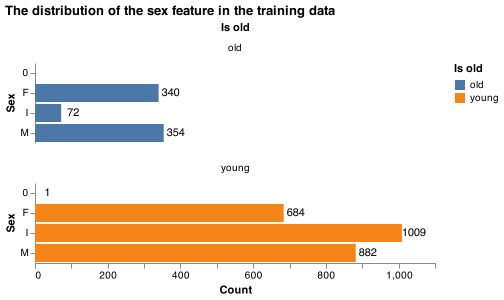

In [3]:
Image("../results/eda/sex_dist.png")

Figure 3. The distribution of sexes for both classes, young and old, of abalone in the training data

Since the target classes, `old` and `young`, are directly determined by counting the number of `rings`, we were able to determine the correlation of numerical features with the number of `rings`, as well as the correlation among other features (Figure 4). Based on the correlation values, many of the features are highly correlated with other features. As for correlation with `rings`, the `Shell weight` seemed to have the greatest correlation value (0.69) with `rings`, while `Shucked weight` appeared to have the lowest correlation with `rings` (0.54). Based on the correlation heat map, it appears that the numerical features are at least moderately correlated with `rings`.

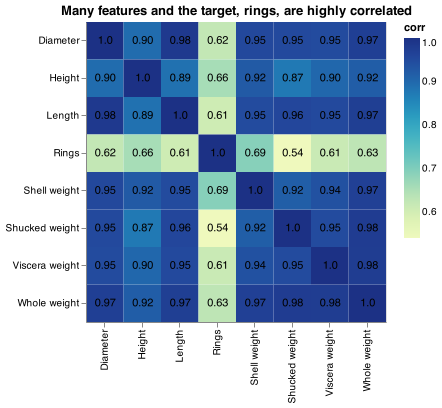

In [4]:
Image("../results/eda/correlation_map.png")

Figure 4. Correlations between numerical features and the number of rings in an abalone in the training data

## Interpretations and model results

An important note about the training data is that there exists a class imbalance between `old` and `young` target classes. With more examples of the target class, `young`, this could have an affect on the accuracy of the model. Because of this fact, we may considered additional scoring metrics in addition to accuracy, such as recall, precision, and f1 score to account for this class imbalance.

Observing the distributions of the numerical features gives some insight into some of the distinctions between the `old` class and `young` class of abalone. For example, when abalone are `old`, there are only a few examples where the abalone `length` is below 0.38, whereas the `young` class has many examples of abalone where their `length` is below 0.38. Another example that is observable is that for the `diameter` feature, there are few examples of `old` abalone that contain a `diameter` less than 0.30, while `young` abalone have a number of examples where their `diameter` is less than 0.30.

There is a relatively even distribution between the `Male` and `Female` abalone within each of the target classes, `young` and `old`. This is expected behaviour of the distribution between `Male` and `Female`, as there likely isn't any bias toward one sex within this organism. However, the `Infant` category of the `Sex` feature has a greater number of examples that are `young` compared to `old`. This is expected, since `Infants` are expected to be younger abalone. The indistinct distribution of `Male` and `Female` abalone within the `old` and `young` classes likely doesn't provide any predictive value to our model. Additionally, since the objective of the model is to predict whether an abalone is `young` or `old`, it may not make sense to include the `Sex` feature in the model as the presence of the `Infant` category within the `Sex` feature would make this classification model redundant.

The correlation map provides useful information in determining what feature might be valuable for predicting whether an abalone is `old` or `young`. Since many of the numerical features seem to be at least moderately correlated with the number of `rings` (which directly determines age of abalone), many of these numerical features are likely useful to include in our model.

We fit a logistic regression on the train data as we are dealing with a binary classification problem. The model set the target class `old` as 0 and `young` as 1. We first build a preprocessor which transfers the `sex` category by using One-Hot-Encoding and applies standard scaler on other numeric features. Then, we use grid search cross validation to find the best hyperparameter for the logistic regression. The tuning results is shown in the figure 5 and table 1. The best model fit is when `C = 100` and the model is exported as a `.sav` file. After fitting the model, we use test set to check the model performance. In table 2, the metrics on the test data set is shown. As we have `young` class as 1 and more `young` in data set, we can expect a relatively high recall score. To have a further look into the model's coefficient, we output the coefficient in table 3 and plot a bar chart to show the importance of features. The `shucked_weight` and if the abalone is infant is most positively correlated with abalone being `young` and if the `whole weight` is most negatively correlated. As we lack domain knowledge in abalone, we can interpret why two weights point to opposite direction in the model. But it is understandable that being an infant abalone is correlated with being `young`.

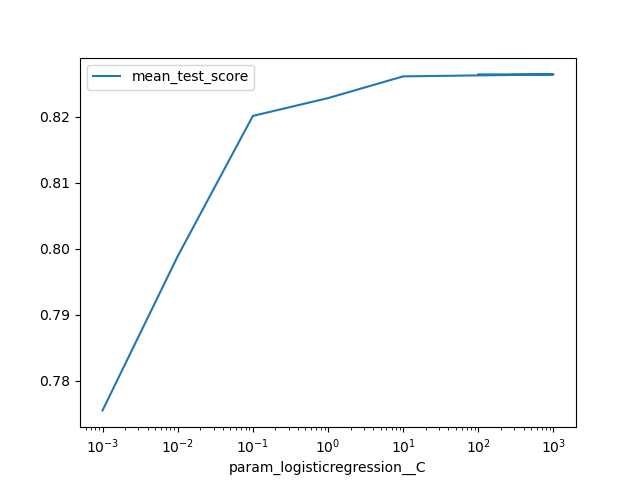

In [3]:
Image("../results/model/cv_result.png")

Figure 5. Validation score with different hyperparameter C

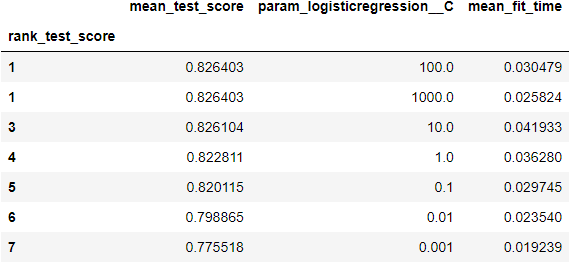

In [4]:
Image("../results/model/train_result_table.png")

Table 1. A closer look to each parameter and validation score

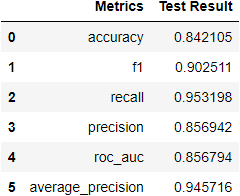

In [5]:
Image("../results/model/test_result_table.png")

Table 2. Test results on different metrics

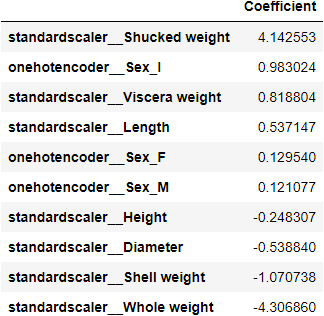

In [6]:
Image("../results/model/coeff_sorted.png")

Table 3. Feature importance in our logistic model

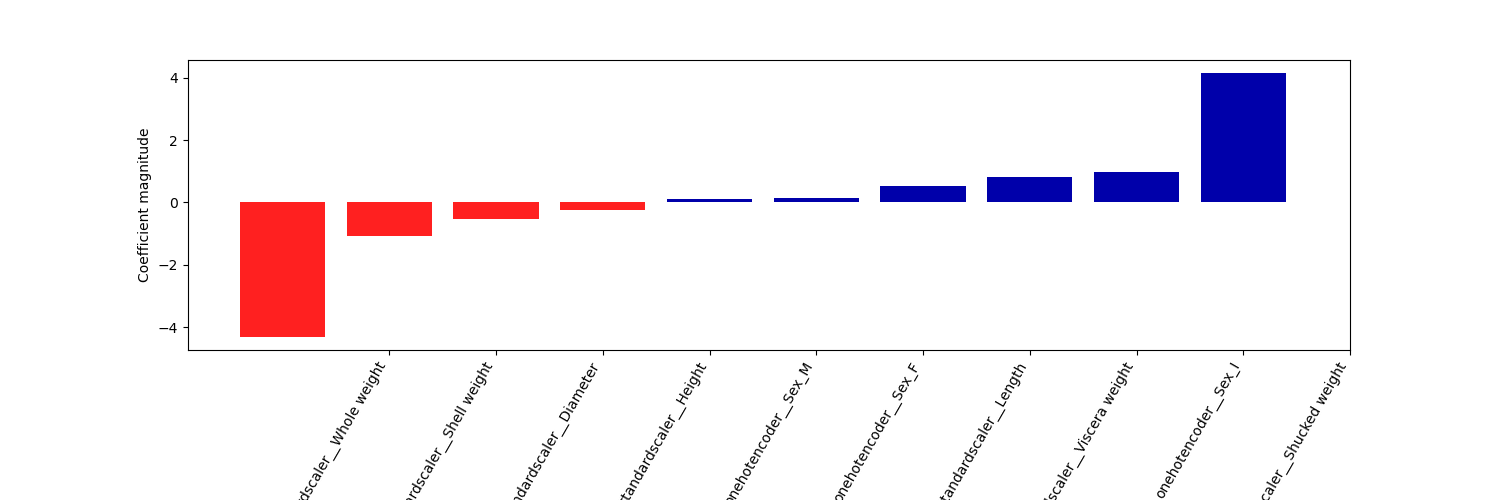

In [7]:
Image("../results/model/coeff_bar.png")

Figure 6. Feature importance as a bar chart

## Limitations and assumptions
One limitation is that we found some of the input features are highly correlated. For example, the correlation between `whole weight` and `length` of abalone is 0.97, indicating that these two features are highly positively correlated. This will potentially raise the multicollinearity concern. As a result, it can become difficult for the model to estimate the relationship between each independent variable and the dependent variable independently. One method to address correlated features is to use recursive feature elimination to exclude features with little importance so we can fit a more interpretable model. Since our primary goal is to make classification on the abalone age (old or young), and we don’t need to understand the role of each independent variable such as `weight` and `height`, we did not take additional actions to reduce the multicollinearity problem in this project.

We fit a logistic regression and tune it by using grid search. Other classification models like decision tree or KNN can be used in this project. We choose logistic regression for its good interpretability and its performance. However, with better feature engineering or better model selection, the performance can be improved.

Also, the `infant` category for `Sex` of a abalone is included in this project. In future additional analysis, we would remove this category, considering the fact that being an infant indicates being at young age for an abalone. 

Another limitation might be that the authors of this project lack the domain knowledge to feature engineer the model inputs. We included all features in the data set in our classification model for predicting age. Additional feature engineering given domain knowledge would potentially improve the model accuracy.

## Future directions 
Future analyses can be performed to improve this classification model. For example, we are interested in adding additional features such as: the geographical location where the abalones are collected, abalone species, color, number of predators and living environment etc. Consultation with domain experts must also be considered for appropriate and accurate analysis directions.

## References

```{bibliography} references.bib
:all:
```